In [3]:
import numpy as np
import math as math

from tools._graphtools import *
from tools._vectools import * 

from scipy.linalg import expm
np.set_printoptions(linewidth=np.inf,precision=3, suppress=True)


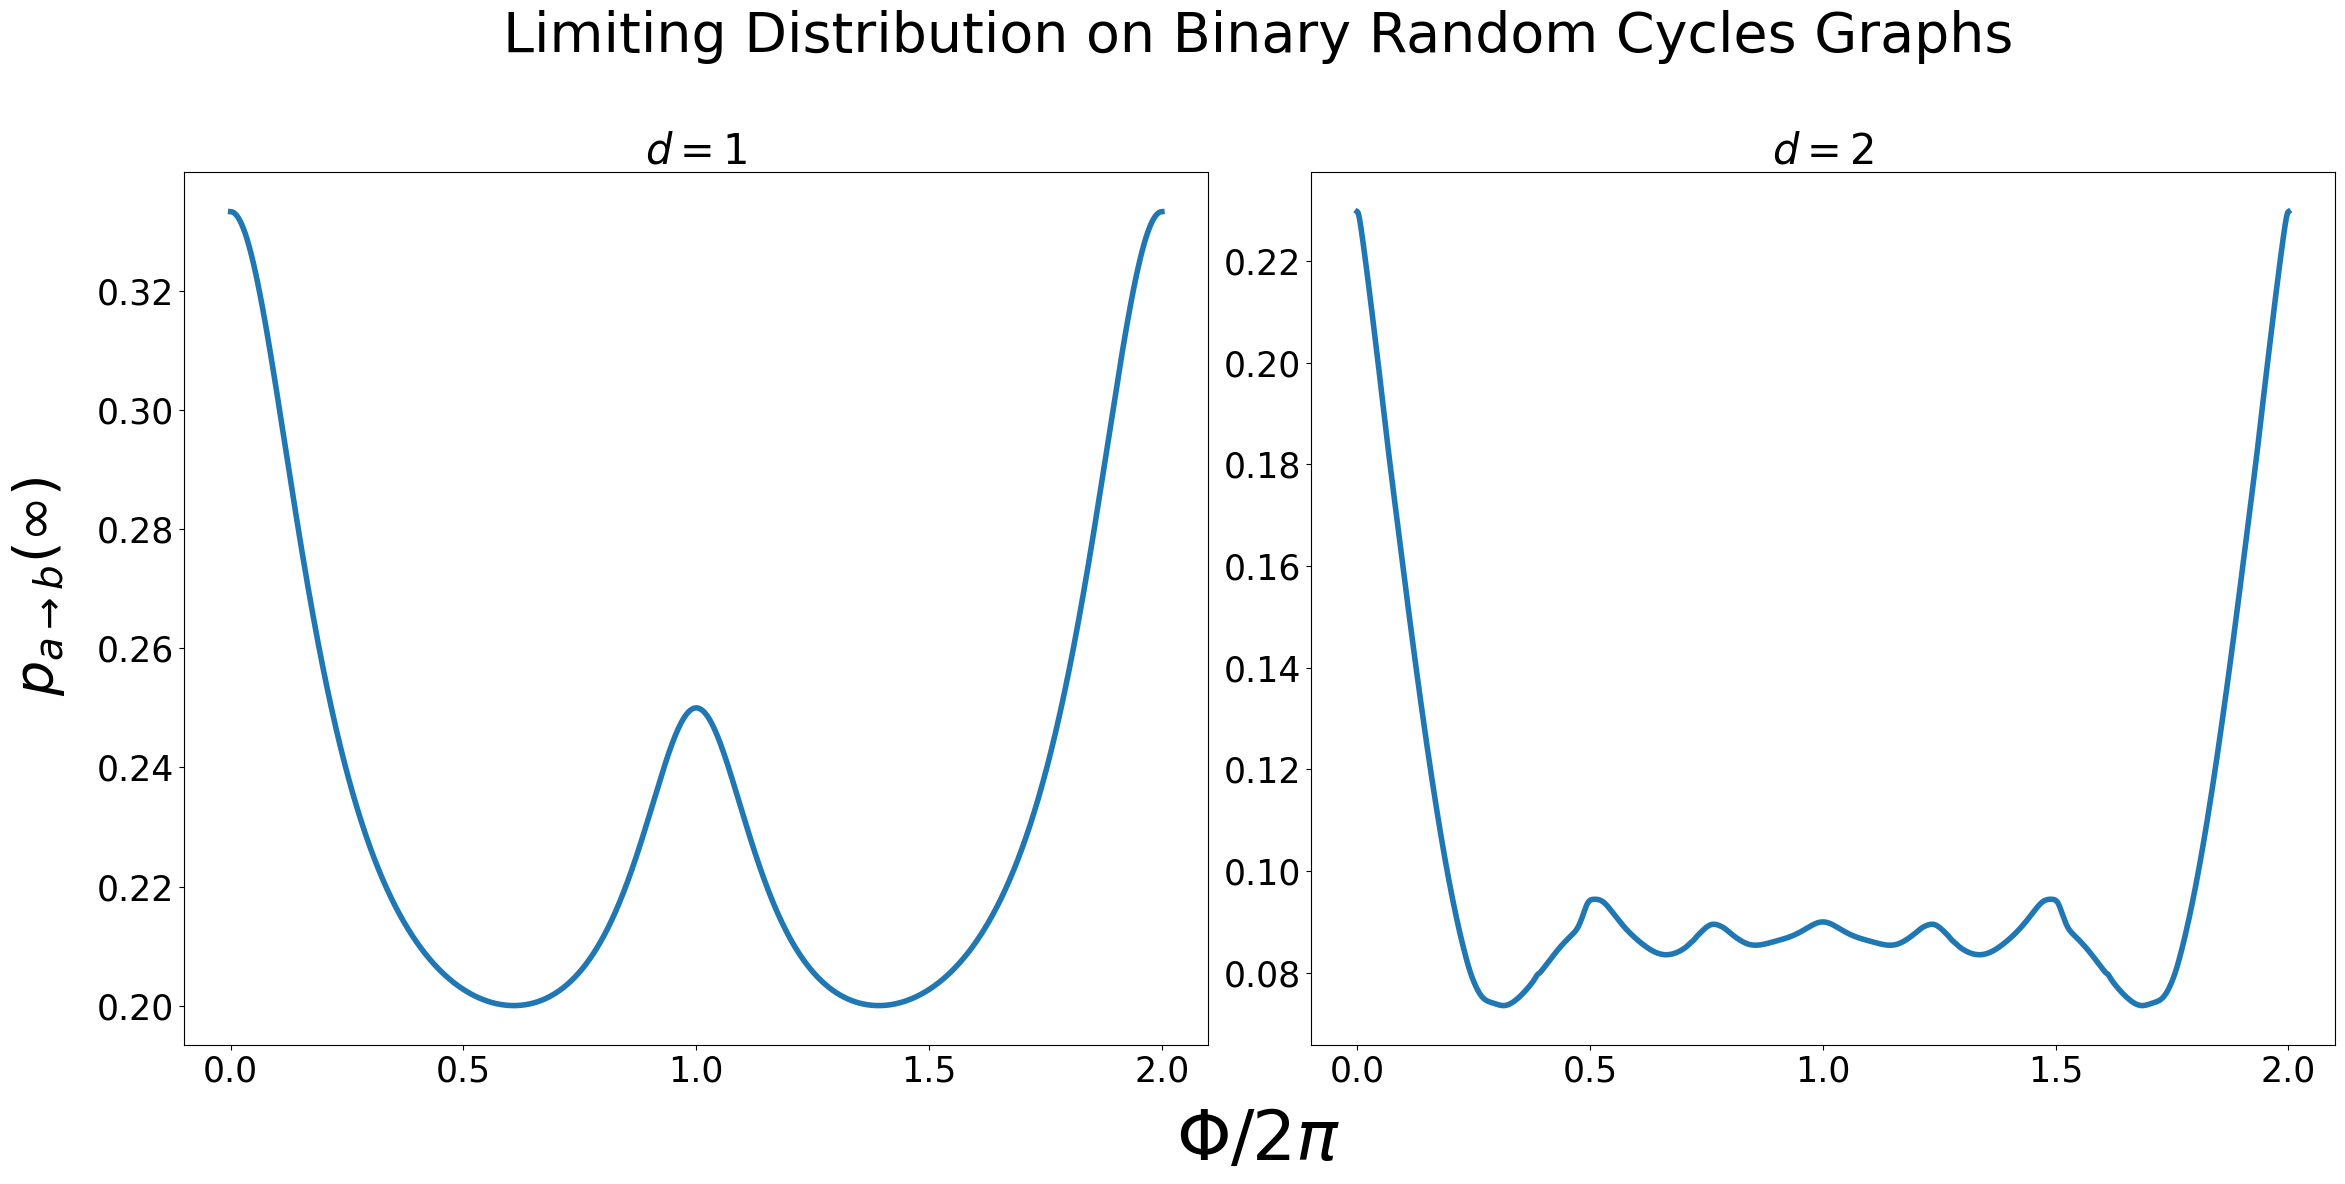

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(26, 12))
axes = axes.flatten()  # Flatten the 2D array for easy iteration

for i in range(1,3):
    data = np.load(f"limitresults/2_{i}_limit.npz",allow_pickle=True)
    flux_lim_dict = data["flux_limit_dict"].item()

    fluxes = list(flux_lim_dict.keys())
    lims = list(flux_lim_dict.values())

    ax = axes[i-1]
    ax.plot(fluxes,lims,lw=4)

    ax.tick_params(axis="both",which="both",labelsize=25)
    ax.set_title(r"$d = %d$" % i,fontsize=30)
    ax.set_xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5)
    )    #ax.set_ylim(0,.16)

fig.suptitle("Limiting Distribution on Binary Random Cycles Graphs", fontsize=40)
fig.supxlabel(r"$\Phi/2\pi$", fontsize=50)
fig.supylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)

plt.tight_layout(rect=[.02, 0, .92, 0.95])

plt.savefig("LimBin.pdf")


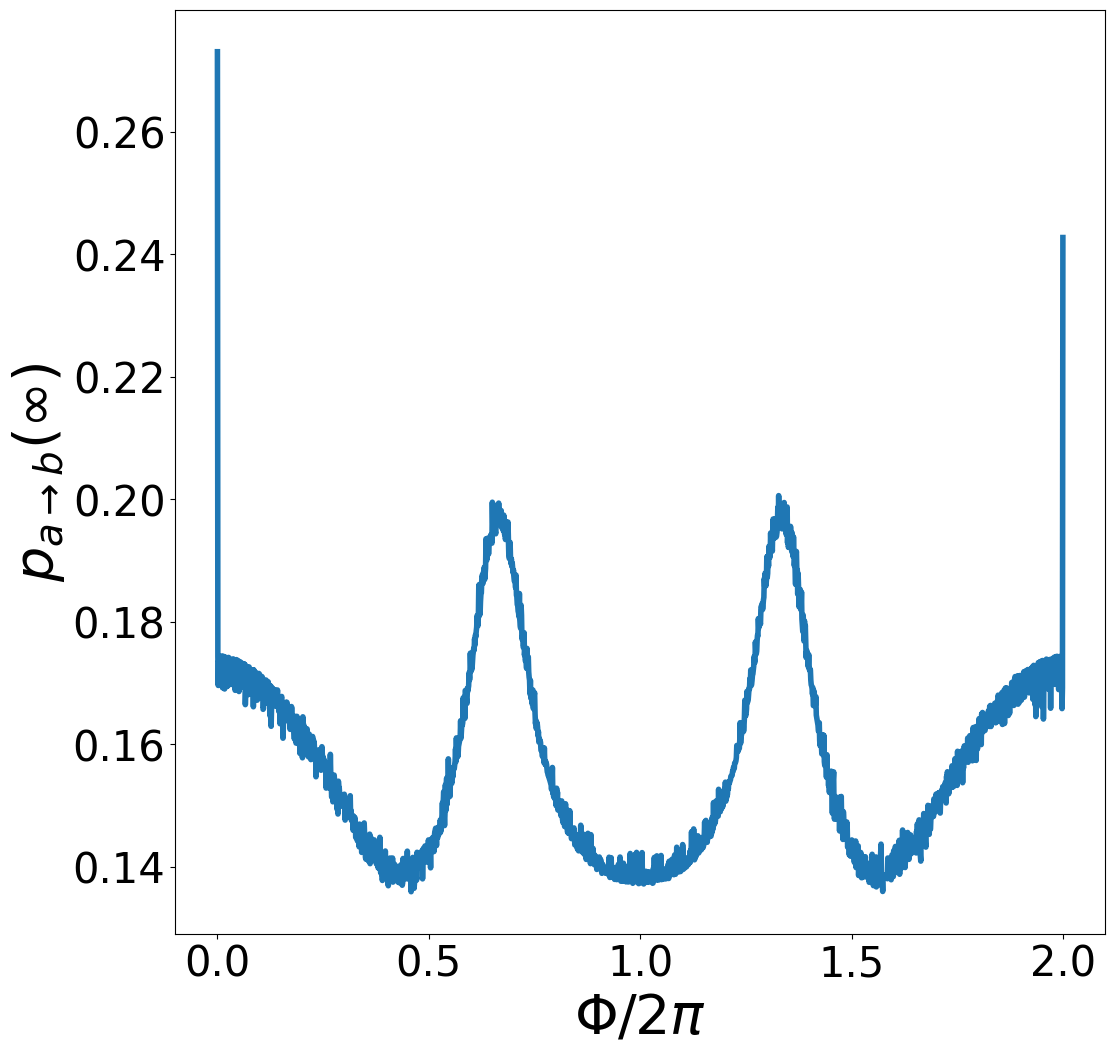

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
axes = [axes] # Flatten the 2D array for easy iteration

for i in range(1,2):
    data = np.load(f"limitresults/3_{i}_limit.npz",allow_pickle=True)
    flux_lim_dict = data["flux_limit_dict"].item()

    fluxes = list(flux_lim_dict.keys())
    lims = list(flux_lim_dict.values())

    ax = axes[i-1]
    ax.plot(fluxes,lims,lw=4)

    ax.tick_params(axis="both",which="both",labelsize=30)
    #ax.set_title(r"$d = %d$" % i,fontsize=20)
    ax.set_xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5)
    )    #ax.set_ylim(0,.16)
    ax.set_xlabel(r"$\Phi/2\pi$", fontsize=40)
    ax.set_ylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)


#fig.suptitle("Limiting Distribution on Ternary Random Cycles Graph", fontsize=40)
#fig.supxlabel(r"$\Phi/2\pi$", fontsize=30)
#fig.supylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)

#plt.tight_layout(rect=[.02, 0, .93, 0.95])
plt.savefig("LimTer.pdf",bbox_inches='tight')

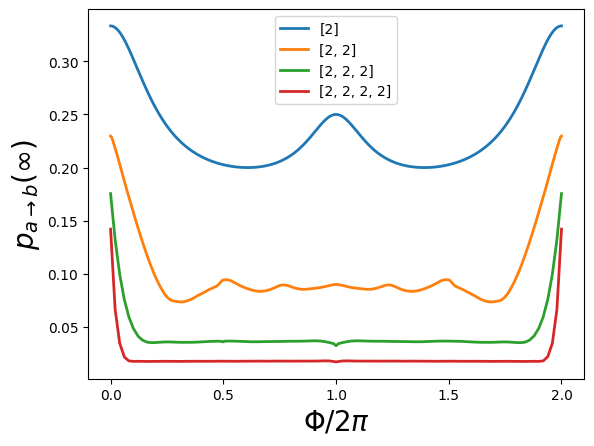

In [23]:
filenames = ["2_1_limit.npz","2_2_limit.npz", "2654272219_10000_MClim.npz","1874285058_10000_MClim.npz"]
folder = "limitresults/"
p=2
sequences = [str(i*[p]) for i in range(1,len(filenames)+1)]
fs = 20


for idx, file in enumerate(filenames):
    data = np.load(folder+file,allow_pickle=True)
    flux_lim_dict = data["flux_limit_dict"].item()

    fluxes = list(flux_lim_dict.keys())
    lims = list(flux_lim_dict.values())
    plt.plot(fluxes,lims,lw=2,label=sequences[idx])

plt.xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5))
plt.xlabel(r"$\Phi/2 \pi$",fontsize=fs)
plt.ylabel(r"$p_{a \rightarrow b}(\infty)$",fontsize=fs)
plt.legend()


In [112]:
#data = np.load(f"limitresults/[2, 2, 2, 2, 2, 2, 2, 2]_gt_lim.npz",allow_pickle=True)


data = np.load(f"limitresults/[2, 2]_gt_lim.npz",allow_pickle=True)
fluxes = data['fluxes']
lims = data['flux_limits']

data2 = np.load(f"limitresults/[2, 2, 2]_gt_lim.npz",allow_pickle=True)
fluxes2 = data2['fluxes']
lims2 = data2['flux_limits']

data3 = np.load(f"limitresults/[2, 2, 2, 2]_gt_lim.npz",allow_pickle=True)
fluxes3 = data3['fluxes']
lims3 = data3['flux_limits']

data4 = np.load(f"limitresults/[2, 2, 2, 2, 2]_gt_lim.npz",allow_pickle=True)
fluxes4 = data4['fluxes']
lims4 = data4['flux_limits']

X = data['sequence']
Z = np.prod(X)

FBP = [2*np.pi/Z * i for i in range(1, Z+1)]

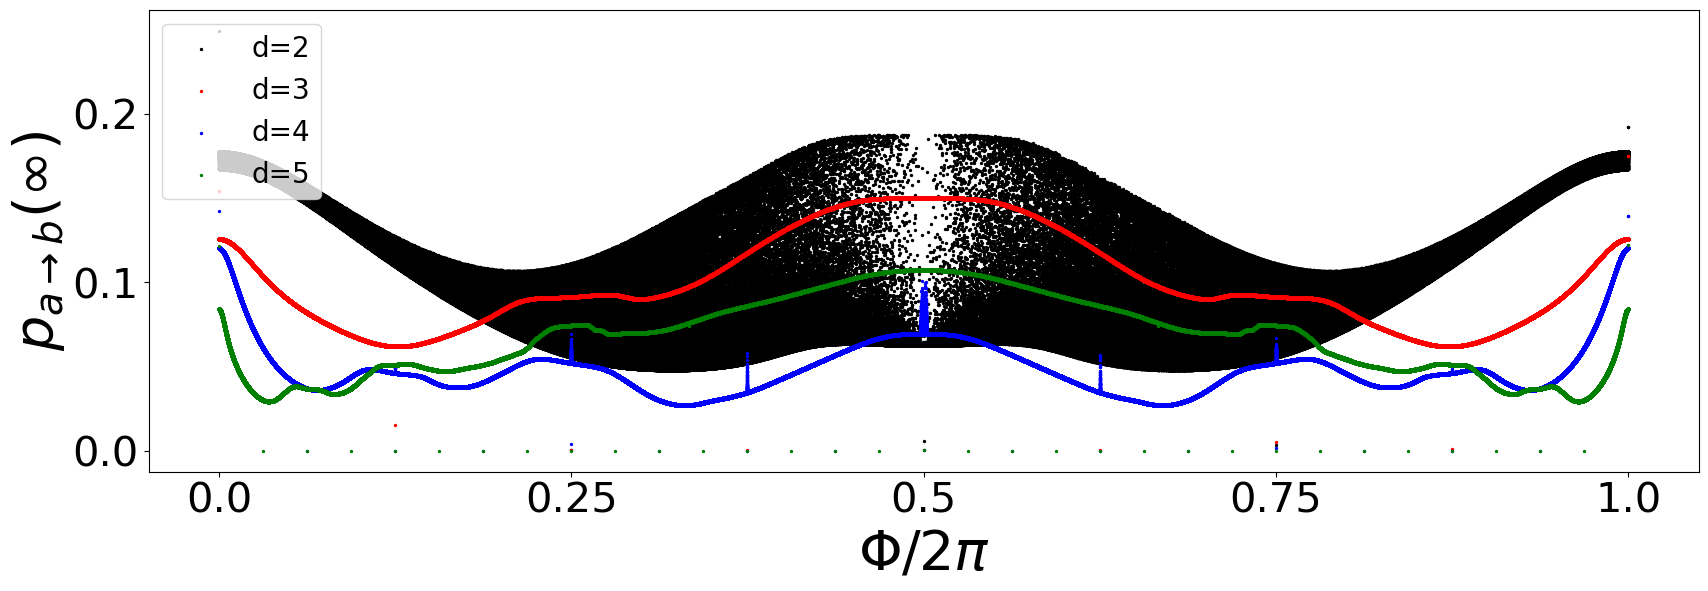

In [121]:
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
axes = [axes] # Flatten the 2D array for easy iteration
ax = axes[0]

ax.tick_params(axis="both",which="both",labelsize=30)
#ax.set_title(r"$d = %d$" % i,fontsize=20)
ax.set_xticks(
    np.linspace(0, 2*np.pi, 5),
    np.linspace(0,       1, 5)
)   
ax.set_xlabel(r"$\Phi/2\pi$", fontsize=40)
ax.set_ylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)
#ax.set_yscale("log")
#for point in FBP:
#    ax.axvline(point, color='black',alpha=.4)
dotsize = 2
ax.scatter(fluxes,lims,s=dotsize,color="black",label="d=2")
ax.scatter(fluxes2,lims2,s=dotsize,color="red",label="d=3")
ax.scatter(fluxes3,lims3,s=dotsize,color="blue",label="d=4")
ax.scatter(fluxes4,lims4,s=dotsize,color="green",label="d=5")

ax.legend(loc="upper left",fontsize=20)

plt.savefig("moustache.pdf")